<span style="color: red; font-size: 20px;">Flirt Analysis - Nachiyar Thirumozhi</span>

In [1]:
import pandas as pd

Imports Pandas, the most commonly used Python library for data analysis.

Used for reading files, cleaning data, creating dataframes, etc.

In [2]:
df = pd.read_csv('NachiyarThirumozhi.txt', header=None, on_bad_lines='skip', encoding='utf8')

Reads a WhatsApp chat export file saved as mabel.txt.

header=None → There is no header row in WhatsApp raw text exports.

on_bad_lines='skip' → Any corrupted or unreadable lines are ignored.

encoding='utf8' → Ensures proper reading of emojis & special characters.

In [3]:
df

,0
0,Name\tEnglish_Translated_Lines\tEmotion\tSenti...
1,Andal\tWill you not show me your divine grace?...
2,Andal\tWill you not show me your divine grace?...
3,Andal\tOnly your presence brings peace to my s...
4,Krishna\tI watch over you with unending affect...
...,...
165,Andal\tEvery moment without you feels incomple...
166,Krishna\tYour devotion is the light that guide...
167,Andal\tMy love for you grows deeper with every...
168,Andal\tYour flute calls me even in dreams.\tlo...


In [4]:
with open("NachiyarThirumozhi.txt", "r", encoding="utf-8") as f:
    for i in range(10):
        print(f.readline())


Name	English_Translated_Lines	Emotion	Sentiment	Intent

Andal	Will you not show me your divine grace?	yearning	emotional	divine union

Krishna	Beloved Andal, your devotion is unmatched.	affection	very positive	divine support

Andal	Will you not show me your divine grace?	longing	positive	seek reassurance

Krishna	Beloved Andal, your devotion is unmatched.	joy	very positive	respond to devotion

Andal	Only your presence brings peace to my soul.	devotion	very positive	seek reassurance

Krishna	I watch over you with unending affection.	joy	positive	reassure

Andal	O Krishna, why do you hide from my longing heart?	longing	emotional	emotional expression

Krishna	You are forever dear to my heart.	trust	very positive	reassure

Andal	O Krishna, why do you hide from my longing heart?	love	emotional	seek reassurance



In [5]:
df = pd.read_csv("NachiyarThirumozhi.txt", sep="\t")
df

,Name,English_Translated_Lines,Emotion,Sentiment,Intent
0,Andal,Will you not show me your divine grace?,yearning,emotional,divine union
1,Krishna,"Beloved Andal, your devotion is unmatched.",affection,very positive,divine support
2,Andal,Will you not show me your divine grace?,longing,positive,seek reassurance
3,Krishna,"Beloved Andal, your devotion is unmatched.",joy,very positive,respond to devotion
4,Andal,Only your presence brings peace to my soul.,devotion,very positive,seek reassurance
...,...,...,...,...,...
195,Krishna,Your devotion is the light that guides me.,affection,very positive,divine support
196,Andal,My love for you grows deeper with every breath.,yearning,emotional,emotional expression
197,Krishna,"I am always with you, never doubt my presence.",affection,very positive,reassure
198,Andal,Your flute calls me even in dreams.,longing,emotional,express love


In [6]:
df.rename(columns={"English_Translated_Lines": "Dialogue"}, inplace=True)
df

,Name,Dialogue,Emotion,Sentiment,Intent
0,Andal,Will you not show me your divine grace?,yearning,emotional,divine union
1,Krishna,"Beloved Andal, your devotion is unmatched.",affection,very positive,divine support
2,Andal,Will you not show me your divine grace?,longing,positive,seek reassurance
3,Krishna,"Beloved Andal, your devotion is unmatched.",joy,very positive,respond to devotion
4,Andal,Only your presence brings peace to my soul.,devotion,very positive,seek reassurance
...,...,...,...,...,...
195,Krishna,Your devotion is the light that guides me.,affection,very positive,divine support
196,Andal,My love for you grows deeper with every breath.,yearning,emotional,emotional expression
197,Krishna,"I am always with you, never doubt my presence.",affection,very positive,reassure
198,Andal,Your flute calls me even in dreams.,longing,emotional,express love


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       200 non-null    object
 1   Dialogue   200 non-null    object
 2   Emotion    200 non-null    object
 3   Sentiment  200 non-null    object
 4   Intent     200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
dataset=df
dataset.dropna(inplace=True)
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GOWTHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
print(dataset.columns)

Index(['Name', 'Dialogue', 'Emotion', 'Sentiment', 'Intent'], dtype='object')


In [10]:
senti=sid.polarity_scores(dataset['Dialogue'][45])
senti

{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.0258}

In [11]:
 def sentimentalAnalysis(data,columnname):
        
        #downloading vader_lexicon for the process
        import matplotlib.pyplot as plt
        import seaborn as sns
        "Importing Necessary Packeage"
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        "Deleting null pr empty value"
        data.dropna(inplace=True)
        
        "Checking for a comment"
        #sid.polarity_scores(data[columnname][93])
        
        "Creating respective columns"
        
        data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
        data['Negtive']  = data['scores'].apply(lambda score_dict: score_dict['neg'])
        data['Postive']  = data['scores'].apply(lambda score_dict: score_dict['pos'])
        data['Neutral']  = data['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        #comp=sns.countplot(x = 'comp_score', hue = 'Name', data = data, palette = 'magma')
        #comp.figure.savefig("date_charts.png")
        "Checking how many pos and neg"
        posneg=pd.DataFrame(data['comp_score'].value_counts())
        return posneg,data
    

In [12]:
pos,data_Senti=sentimentalAnalysis(dataset,columnname='Dialogue')

<Figure size 640x480 with 0 Axes>

In [13]:
data_Senti

,Name,Dialogue,Emotion,Sentiment,Intent,scores,compound,Negtive,Postive,Neutral,comp_score
0,Andal,Will you not show me your divine grace?,yearning,emotional,divine union,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.7506,0.000,0.516,0.484,pos
1,Krishna,"Beloved Andal, your devotion is unmatched.",affection,very positive,divine support,"{'neg': 0.123, 'neu': 0.283, 'pos': 0.594, 'co...",0.7184,0.123,0.594,0.283,pos
2,Andal,Will you not show me your divine grace?,longing,positive,seek reassurance,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.7506,0.000,0.516,0.484,pos
3,Krishna,"Beloved Andal, your devotion is unmatched.",joy,very positive,respond to devotion,"{'neg': 0.123, 'neu': 0.283, 'pos': 0.594, 'co...",0.7184,0.123,0.594,0.283,pos
4,Andal,Only your presence brings peace to my soul.,devotion,very positive,seek reassurance,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.5423,0.000,0.333,0.667,pos
...,...,...,...,...,...,...,...,...,...,...,...
195,Krishna,Your devotion is the light that guides me.,affection,very positive,divine support,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.4588,0.000,0.300,0.700,pos
196,Andal,My love for you grows deeper with every breath.,yearning,emotional,emotional expression,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.6369,0.000,0.344,0.656,pos
197,Krishna,"I am always with you, never doubt my presence.",affection,very positive,reassure,"{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'comp...",0.2755,0.000,0.232,0.768,pos
198,Andal,Your flute calls me even in dreams.,longing,emotional,express love,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.4019,0.000,0.310,0.690,pos


In [14]:
pos

,count
comp_score,
pos,178
neg,22


<span style="color: red; font-size: 20px;">FEATURE EXTRACTION METHODS</span>

<span style="color: red; font-size: 20px;">1.TF-IDF Vector 2. Counter Vector 3. Hash Vector</span>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm=tfidf.fit_transform(df["Dialogue"])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
cv_matrix = cv.fit_transform(dataset["Dialogue"])

In [17]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5000, stop_words='english', alternate_sign=False)
hv_matrix = hv.fit_transform(dataset["Dialogue"])

In [18]:
features = {
    "TFIDF": dtm,
    "COUNT": cv_matrix,
    "HASH":  hv_matrix
}

CLUSTERING ALGORITHMS

In [20]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

algorithms = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "MiniBatch": MiniBatchKMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5)
}

#ALL (VECTOR × ALGORITHM) AND EVALUATE

results = {}

for vec_name, X in features.items():
    for algo_name, algo in algorithms.items():

        name = f"{algo_name}_{vec_name}"
        print("Training:", name)

        # Agglomerative needs dense matrix
        if algo_name == "Agglomerative":
            labels = algo.fit_predict(X.toarray())
            score = silhouette_score(X.toarray(), labels)
        else:
            labels = algo.fit_predict(X)
            score = silhouette_score(X, labels)

        results[name] = score


Training: KMeans_TFIDF
Training: MiniBatch_TFIDF
Training: Agglomerative_TFIDF
Training: KMeans_COUNT
Training: MiniBatch_COUNT
Training: Agglomerative_COUNT
Training: KMeans_HASH
Training: MiniBatch_HASH
Training: Agglomerative_HASH


In [21]:
#PRINT SCORES + BEST MODEL
print("\nSilhouette Scores")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

best = max(results, key=results.get)
print(f"\n BEST MODEL = {best}  (Score = {results[best]:.4f})")



Silhouette Scores
KMeans_TFIDF: 0.2897
MiniBatch_TFIDF: 0.3098
Agglomerative_TFIDF: 0.3301
KMeans_COUNT: 0.2995
MiniBatch_COUNT: 0.3104
Agglomerative_COUNT: 0.3306
KMeans_HASH: 0.3317
MiniBatch_HASH: 0.3305
Agglomerative_HASH: 0.3394

 BEST MODEL = Agglomerative_HASH  (Score = 0.3394)


<span style="color: red; font-size: 20px;">Topic Modelling</span>

In [23]:
#Assign cluster labels back to dataset

df["Cluster"] = AgglomerativeClustering(n_clusters=5).fit_predict(hv_matrix.toarray())


<span style="color: red; font-size: 20px;">NMF (Topic Modeling on TF-IDF)</span>

In [27]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(dtm)
H = nmf.components_

#Extract Top Words per topic

feature_names = tfidf.get_feature_names_out()

def display_topics(H, feature_names, top_words=10):
    for i, topic_vec in enumerate(H):
        top_indices = topic_vec.argsort()[-top_words:]
        print(f"\nTopic {i+1}:")
        print(", ".join([feature_names[j] for j in top_indices]))

display_topics(H, feature_names)



Topic 1:
divine, strengthen, test, deeply, beloved, unmatched, andal, devotion, light, guides

Topic 2:
divine, entire, illuminates, universe, breath, grows, deeper, eternal, path, love

Topic 3:
forever, feels, incomplete, closer, draws, hide, krishna, moment, heart, longing

Topic 4:
unmatched, strongest, purity, melts, storms, doubt, brings, peace, soul, presence

Topic 5:
feels, absence, nights, thousand, like, sings, hearts, calls, dreams, flute


LDA (Topic Modeling on CountVectorizer)

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)
cv_features = cv.get_feature_names_out()

def print_lda_topics(model, features, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        top_idx = topic.argsort()[-n_top_words:]
        print(", ".join(features[i] for i in top_idx))

print_lda_topics(lda, cv_features)




Topic 1:
presence, love, strengthen, test, grace, divine, purity, melts, strongest, storms

Topic 2:
illuminates, universe, entire, love, endlessly, searches, heart, affection, unending, watch

Topic 3:
hearts, like, flute, forever, dear, heart, brings, peace, soul, presence

Topic 4:
presence, deeper, grows, breath, path, eternal, guides, light, devotion, love

Topic 5:
andal, closer, draws, flute, dreams, calls, feels, devotion, moment, longing


<span style="color: red; font-size: 20px;">TF-IDF : LDA</span>

In [27]:

from sklearn.decomposition import LatentDirichletAllocation

# LDA Model on TF-IDF
lda_tfidf = LatentDirichletAllocation(
    n_components=5, 
    random_state=42,
    learning_method='online'
)
lda_tfidf.fit(dtm)



LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=42)

In [28]:
# Display topics
words = tfidf.get_feature_names_out()

def show_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}")
        print(", ".join([feature_names[i] 
                         for i in topic.argsort()[:-n_words - 1:-1]]))

show_topics(lda_tfidf, words)



Topic 1
storms, purity, melts, strongest, divine, grace, strengthen, test, love, devotion

Topic 2
love, eternal, path, searches, endlessly, watch, affection, unending, universe, entire

Topic 3
forever, dear, soul, peace, brings, presence, heart, hearts, sings, like

Topic 4
guides, light, devotion, feels, incomplete, moment, absence, thousand, nights, like

Topic 5
longing, calls, dreams, doubt, flute, breath, grows, deeper, krishna, hide


<span style="color: red; font-size: 20px;">WordCloud - TFIDF</span>

In [29]:
dataset=df
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOWTHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

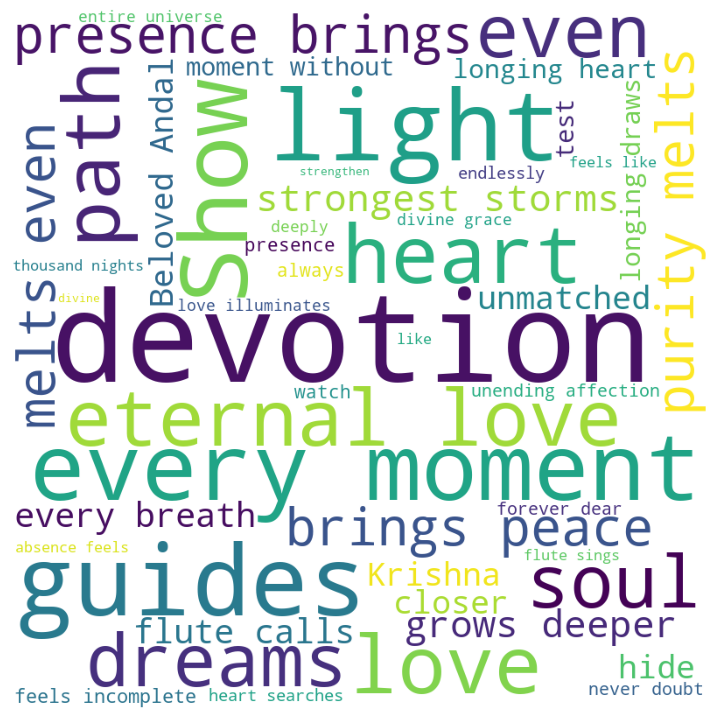

In [31]:
comment_words = []
stoplist = stopwords.words('english')
stoplist.extend(['omitted', 'voice','missed','call','video','deleted','media','message'])
wordcloudss="This function saves image"
dataset.index=range(dataset.shape[0])
for i in range(1,len(dataset)): 
    comment_words.append(dataset['Dialogue'][i])
    vv=" ".join(comment_words)          
    wordcloud = WordCloud(width = 800, height = 800, 
                                background_color ='white', 
                                      stopwords = stoplist, 
                                      min_font_size = 10).generate(vv)         
plt.figure(figsize = (9, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<span style="color: red; font-size: 20px;">MESSAGE CLUSTERING (KMeans + TF-IDF)</span>

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(dtm)

dataset["Cluster"] = clusters
print(dataset[["Dialogue", "Cluster"]].head(5))



                                      Dialogue  Cluster
0      Will you not show me your divine grace?        0
1   Beloved Andal, your devotion is unmatched.        4
2      Will you not show me your divine grace?        0
3   Beloved Andal, your devotion is unmatched.        4
4  Only your presence brings peace to my soul.        0


<span style="color: red; font-size: 20px;">WordCloud (with CountVectorizer)</span>

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

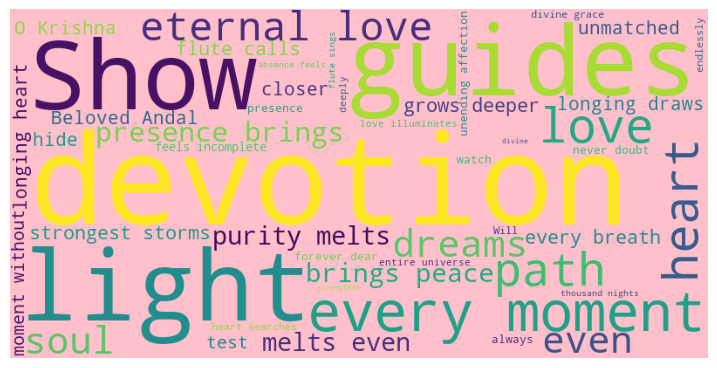

In [44]:
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, background_color ='pink').generate(" ".join(dataset["Dialogue"]))
plt.figure(figsize = (9, 7), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")


<span style="color: red; font-size: 20px;">TOP FREQUENT WORDS (CountVectorizer)</span>

In [32]:
word_freq = cv_matrix.sum(axis=0).A1
vocab = cv.get_feature_names_out()

freq_df = pd.DataFrame({"word": vocab, "frequency": word_freq})
freq_df = freq_df.sort_values("frequency", ascending=False)

print(freq_df.head(5))

        word  frequency
11  devotion         41
34      love         36
25     heart         28
31     light         23
24    guides         23


<span style="color: red; font-size: 20px;">Hash Vector</span>

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(
    n_features=5000,
    stop_words='english',
    alternate_sign=False
)

hv_matrix = hv.fit_transform(dataset["Dialogue"])

print("HashingVectorizer shape:", hv_matrix.shape)

HashingVectorizer shape: (200, 5000)


<span style="color: red; font-size: 20px;">Message Clustering with HashingVectorizer</span>

In [34]:
from sklearn.cluster import KMeans
num_clusters = 5
km_model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model and get the cluster labels
cluster_labels = km_model.fit_predict(X)


In [35]:
df['Cluster'] = cluster_labels
print(dataset[["Dialogue", "Cluster"]].head(5))

                                      Dialogue  Cluster
0      Will you not show me your divine grace?        0
1   Beloved Andal, your devotion is unmatched.        1
2      Will you not show me your divine grace?        0
3   Beloved Andal, your devotion is unmatched.        1
4  Only your presence brings peace to my soul.        4


<span style="color: red; font-size: 20px;">Word count per person</span>

In [36]:
df['Word_Count'] = df['Dialogue'].str.split().str.len()
word_count_per_person = df.groupby('Name')['Word_Count'].sum()

# Who speaks more words
most_words_person = word_count_per_person.idxmax()

print("=  Word Count  =")
print(word_count_per_person)

print("=  Who Speaks More  =")
print(most_words_person)

=  Word Count  =
Name
Andal      780
Krishna    746
Name: Word_Count, dtype: int64
=  Who Speaks More  =
Andal


<span style="color: red; font-size: 20px;">Emotion Distribution (Pie Chart)</span>

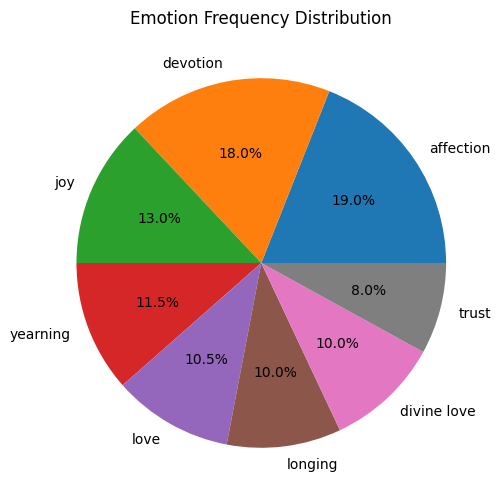

In [38]:
emotion_count = df['Emotion'].value_counts()
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
emotion_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Emotion Frequency Distribution")
plt.ylabel("")
plt.show()


<span style="color: red; font-size: 20px;">Love / Fight Encounter</span>

In [39]:
love_keywords = ['love', 'miss', 'baby', 'babe', 'dear', 'sweet', 'kiss']
fight_keywords = ['angry', 'fight', 'hate', 'annoy', 'sad']

# Love score per message
df['Love_Score'] = df['Dialogue'].apply(
    lambda x: sum(1 for w in love_keywords if w in x.lower())
)

# Fight score per message
df['Fight_Score'] = df['Dialogue'].apply(
    lambda x: sum(1 for w in fight_keywords if w in x.lower())
)

# Total per person
love_by_person = df.groupby('Name')['Love_Score'].sum()
fight_by_person = df.groupby('Name')['Fight_Score'].sum()

print("=  Love Score  =")
print(love_by_person)

print("=  Fight Score  =")
print(fight_by_person)

=  Love Score  =
Name
Andal      26
Krishna    30
Name: Love_Score, dtype: int64
=  Fight Score  =
Name
Andal      0
Krishna    0
Name: Fight_Score, dtype: int64


<span style="color: red; font-size: 20px;">Question Encounters</span>

In [40]:
# Messages that are questions
df['Is_Question'] = df['Dialogue'].str.contains(r'\?', regex=True)

questions_by_person = df.groupby('Name')['Is_Question'].sum()

# Who is more curious?
most_questions = questions_by_person.idxmax()

print("=  Question Messages  =")
print(questions_by_person)

print("=  Who asked more questions  =")
print(most_questions)

=  Question Messages  =
Name
Andal      26
Krishna     0
Name: Is_Question, dtype: int64
=  Who asked more questions  =
Andal


<span style="color: red; font-size: 20px;">WordCloud of Entire Conversation</span>

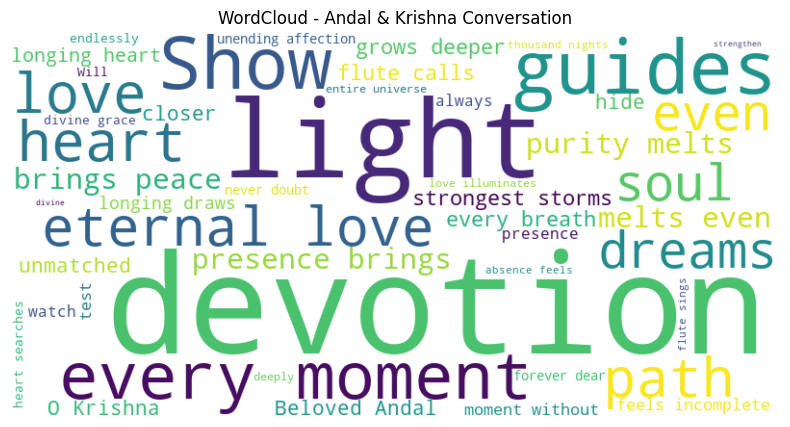

In [42]:
from wordcloud import WordCloud
text = " ".join(df['Dialogue'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Andal & Krishna Conversation")
plt.show()

<span style="color: red; font-size: 20px;">Emotion Comparison Bar Chart</span>

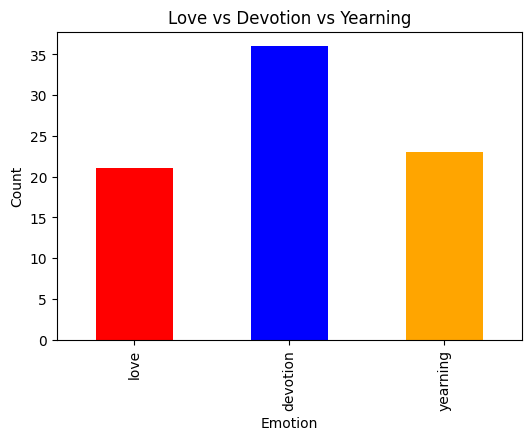

In [43]:
love_group = df['Emotion'].value_counts()[['love','devotion','yearning']]

plt.figure(figsize=(6,4))
love_group.plot(kind='bar', color=['red','blue','orange'])
plt.title("Love vs Devotion vs Yearning")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

<span style="color: red; font-size: 20px;">Flirt Metrics</span>

In [44]:
# Total messages sent by each person
msg_count = df["Name"].value_counts()

talkative = msg_count.idxmax()

# ---------- FLIRT ANALYSIS ----------
flirt_keywords = [
    "love","dear","baby","miss","sweetheart","darling",
    "kiss","hug","cute","beautiful","handsome","crush",
    "romantic","want you","my heart","my love"
]

def check_flirt(text):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(word in text for word in flirt_keywords)

df["Flirt"] = df["Dialogue"].apply(check_flirt)

flirt_counts = df.groupby("Name")["Flirt"].sum()
flirt_total = df["Flirt"].sum()

if flirt_total == 0:
    flirt_percent = {name:0 for name in df["Name"].unique()}
else:
    flirt_percent = round((flirt_counts / flirt_total) * 100, 2)


In [45]:
print("==============  FLIRT ENCOUNTERS  ==============")
print(f"Talkative: {talkative}")
print("\nFlirt Percentage (per person):")
print(flirt_percent)

==============  FLIRT ENCOUNTERS  ==============
Talkative: Andal

Flirt Percentage (per person):
Name
Andal      53.12
Krishna    46.88
Name: Flirt, dtype: float64
